### API SEQUENTIAL

In [11]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
tf.__version__

'2.6.0'

In [3]:
keras.__version__

'2.6.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_ful, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 3s 1us/step


In [6]:
X_train_ful.shape

(60000, 28, 28)

In [7]:
y_train_full.shape

(60000,)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [10]:
X_train_ful.dtype

dtype('uint8')

### Validation Score et Train score

In [11]:
X_val = X_train_ful[:5000]/255
X_train = X_train_ful[5000:]/255

In [12]:
X_val.shape

(5000, 28, 28)

In [13]:
X_train.shape

(55000, 28, 28)

In [14]:
X_val.shape

(5000, 28, 28)

In [15]:
y_val = y_train_full[:5000]
y_train = y_train_full[5000:]

In [16]:
y_val.shape

(5000,)

In [17]:
y_train.shape

(55000,)

In [18]:
y_val

array([9, 0, 0, ..., 5, 8, 3], dtype=uint8)

#### Liste de nom de classe

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [20]:
len(class_names)

10

In [21]:
class_names[y_train[0]]

'Coat'

#### Liste des classe

In [22]:
for i in range(11):
    print(class_names[y_train[i]])

Coat
T-shirt/top
Sneaker
Ankle boot
Ankle boot
Ankle boot
Coat
Coat
Dress
Coat
T-shirt/top


In [23]:
class_names[y_train[10]]

'T-shirt/top'

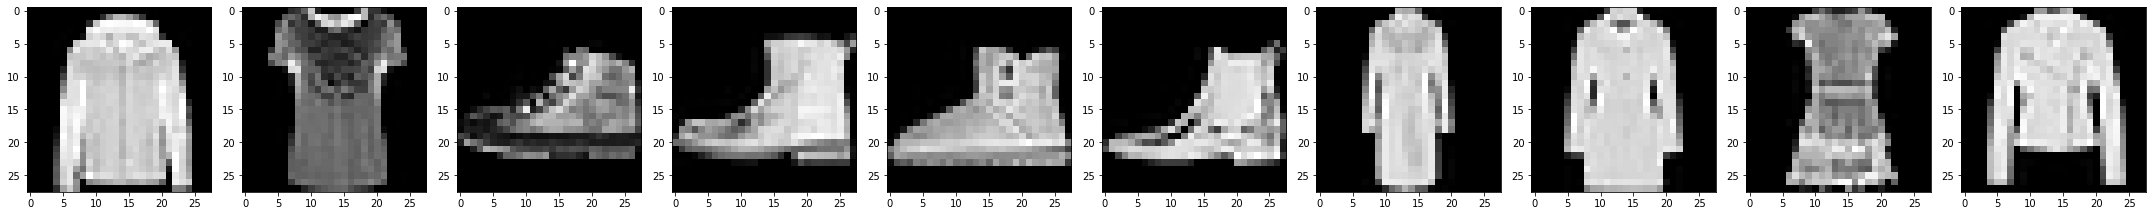

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(30, 10))
for i in range(10):
    ax[i].imshow(X_train[i], cmap='gray')
    #ax[i].title(class_names[y_train[i]])
plt.tight_layout()
plt.show()

### Le perceptron MultiCouche

In [25]:
model = keras.models.Sequential()

In [26]:
model.add(keras.layers.Flatten(input_shape=[28, 28]))

In [27]:
model.add(keras.layers.Dense(300, activation="relu"))

In [28]:
model.add(keras.layers.Dense(100, activation = "relu"))

In [29]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.layers

In [32]:
hidden1 = model.layers[1]
model.get_layer('dense') is hidden1

True

In [33]:
hidden1.name

'dense'

In [34]:
weights, biais = hidden1.get_weights()

In [35]:
weights.shape

(784, 300)

In [36]:
biais.shape

(300,)

In [37]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
keras.utils.to_categorical(y_train).max()

1.0

In [39]:
y_train.max()

9

In [40]:
y_train.argmax()

3

In [41]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 0.7105 - accuracy: 0.7661 - val_loss: 0.5109 - val_accuracy: 0.8222
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4816 - accuracy: 0.8335 - val_loss: 0.4361 - val_accuracy: 0.8540
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4391 - accuracy: 0.8478 - val_loss: 0.4194 - val_accuracy: 0.8576
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4123 - accuracy: 0.8557 - val_loss: 0.3972 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3930 - accuracy: 0.8637 - val_loss: 0.3944 - val_accuracy: 0.8656
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3772 - accuracy: 0.8670 - val_loss: 0.3682 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3644 - accuracy: 0.8722 - val_loss: 0.3613 - val_accuracy:

## Building a Machine Learning (Artificial Neural Network) Model - Python Data Science Intro Project

source : https://www.youtube.com/watch?v=8zwILUzux6o

In [1]:
import os

In [2]:
os.getcwd()

'/home/blanchard/Documents/Deep-learning1'

In [3]:
os.chdir('/home/blanchard/Documents/datasets')

## Description about dataset on kaggle

* Classification des Champignons (Teneur de toxicité des chapignons)
* Découvrez quelles caractéristiques entraînent une mort certaine et lesquelles sont les plus acceptables dans cet ensemble de données sur les caractéristiques des champignons
* Cet ensemble de données comprend des descriptions d'échantillons hypothétiques correspondant à 23 espèces de champignons à branchies dans les champignons de la famille Agaricus et Lepiota sur les champignons nord-américains (1981). 
* Chaque espèce est identifiée comme définitivement comestible, définitivement vénéneuse, ou de comestible inconnue et non recommandée. 

* Période : Donné à l'UCI ML 27 avril 1987


### À propos de ce fichier

Informations sur les attributs : (classes : comestible=e, toxique=p)

* cap-shape: bell=b,conical=c,convex=x,flat=f, knotbed=k,sunken=s

* surface du capuchon : fibreux=f,rainures=g,écailleux=y,lisse=s

* cap-color: marron=n,buff=b,cannelle=c,gris=g,vert=r,rose=p,violet=u,rouge=e,blanc=w,jaune=y

* contusions : contusions=t, non=f

* odeur : amande=a,anis=l,créosote=c,poisson=y,foul=f,moisis=m,aucun=n,piquant=p,épicé=s

* gill-attachment : attaché=a,descendant=d,libre=f,encoche=n

* espacement des branchies : close=c,crowded=w,distant=d

* taille des branchies : large =b, étroite =n

* Gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow= oui

* forme de la tige : enlargement=e,tapering=t

* tige-racine: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

* surface de la tige au-dessus de l'anneau : fibreux=f,écailleux=y,soyeux=k,lisse=s

* tige-surface-sous-anneau : fibreux=f,écailleux=y,soyeux=k,lisse=s

* tige-couleur-au-dessus-anneau: marron=n,buff=b,cannelle=c,gris=g,orange=o,rose=p,rouge=e,blanc=w,jaune=y

* tige-couleur-sous-anneau : marron=n,buff=b,cannelle=c,gris=g,orange=o,rose=p,rouge=e,blanc=w,jaune=y

* veil-type: partial=p,universal=u

* voile-couleur: marron=n,orange=o,blanc=w,jaune=y

* numéro de sonnerie : aucun=n,un=o,deux=t

* type d'anneau : toile d'araignée=c,évanescent=e,flaring=f,large=l,aucun=n,pendentif=p,gainage=s,zone=z

* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

* population: abondante=a,groupée=c,nombreuse=n,éparpillée=s,plusieurs=v,solitaire=y

* habitat : graminées=g,feuilles=l,prés=m,chemins=p,urbain=u,déchets=w,bois=d

* class 

In [12]:
pd.set_option("max_columns", None)
pd.set_option("max_rows", None)
data = pd.read_csv("mushrooms.csv")
df = data.copy()

In [13]:
print("Lignes           :", df.shape[0])
print("Colonnes           :", df.shape[1])
print("\nVariables\n           :", df.columns.to_list())
print("\nIndex\n           :", df.index)

Lignes           : 8124
Colonnes           : 23

Variables
           : ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

Index
           : RangeIndex(start=0, stop=8124, step=1)


In [14]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [15]:
df.describe() # utile pour des var catégorielles

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [16]:
group_list = ['class', 'odor']
df.groupby(group_list).count()

cap-shape  cap-surface  cap-color  bruises  gill-attachment  \
class odor                                                                
e     a           400          400        400      400              400   
      l           400          400        400      400              400   
      n          3408         3408       3408     3408             3408   
p     c           192          192        192      192              192   
      f          2160         2160       2160     2160             2160   
      m            36           36         36       36               36   
      n           120          120        120      120              120   
      p           256          256        256      256              256   
      s           576          576        576      576              576   
      y           576          576        576      576              576   

            gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  \
class odor                                                                 
e     a              400        400         400          400         400   
      l              400        400         400          400         400   
      n             3408       3408        3408         3408        3408   
p     c              192        192         192          192         192   
      f             2160       2160        2160         2160        2160   
      m               36         36          36           36          36   
      n              120        120         120          120         120   
      p              256        256         256          256         256   
      s              576        576         576          576         576   
      y              576        576         576          576         576   

            stalk-surface-above-ring  stalk-surface-below-ring  \
class odor                                                       
e     a                          400                       400   
      l                          400                       400   
      n                         3408                      3408   
p     c                          192                       192   
      f                         2160                      2160   
      m                           36                        36   
      n                          120                       120   
      p                          256                       256   
      s                          576                       576   
      y                          576                       576   

            stalk-color-above-ring  stalk-color-below-ring  veil-type  \
class odor                                                              
e     a                        400                     400        400   
      l                        400                     400        400   
      n                       3408                    3408       3408   
p     c                        192                     192        192   
      f                       2160                    2160       2160   
      m                         36                      36         36   
      n                        120                     120        120   
      p                        256                     256        256   
      s                        576                     576        576   
      y                        576                     576        576   

            veil-color  ring-number  ring-type  spore-print-color  population  \
class odor                                                                      
e     a            400          400        400                400         400   
      l            400          400        400                400         400   
      n           3408         3408       3408               3408        3408   
p     c            192          192        192                192         192   
      f           2160         2160       

### Separate features and label

In [17]:
labels = df['class']
features = df.drop(columns=['class'])

In [18]:
labels[0:5]

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [19]:
features[0:5]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


### codification de label & features

In [20]:
labels.replace({"p":0, "e":1}, inplace=True)

In [21]:
labels[0:5]

0    0
1    1
2    1
3    0
4    1
Name: class, dtype: int64

In [22]:
features = pd.get_dummies(features)

In [23]:
features[0:5]

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


### defines types label and features

In [24]:
features = features.values.astype('float32')
labels = labels.values.astype('float32')

In [25]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=0)
features_train, features_validation, labels_train, labels_validation = train_test_split(features_train, labels_train, test_size=0.2, random_state=0)

In [26]:
print("Dimension of features_train    :", features_train.shape)
print("Dimension of features_validation :", features_validation.shape)
print("Dimension of labels_train :", labels_train.shape)
print("Dimension of labels_validation :", labels_validation.shape)

Dimension of features_train    : (5199, 117)
Dimension of features_validation : (1300, 117)
Dimension of labels_train : (5199,)
Dimension of labels_validation : (1300,)


### Documentation about Keras Sequentiel Model
https://www.actuia.com/keras/debuter-avec-le-modele-sequentiel-de-keras/

In [27]:
# from keras.models import Sequential
# from keras.layers import Dense, Activation

In [28]:
# pile linéaire de couches. 1+
model = keras.Sequential([keras.layers.Dense(32, input_shape=(117,)),
                         keras.layers.Dense(20, activation=tf.nn.relu),
                         keras.layers.Dense(2, activation='softmax')])

# model = keras.Sequential()
# model.add(Dense(32, activation=’relu’, input_dim=100))
# model.add(Dense(1, activation=’sigmoid’))
# model.compile(optimizer=’rmsprop’,
# loss=’binary_crossentropy’,
# metrics=[‘accuracy’])

On parle d'accès séquentiel lorsqu'il est possible d’accéder à un groupe d'éléments (par exemple le contenu d'une structure de données) uniquement selon un ordre prédéfini. 

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                3776      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                660       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 42        
Total params: 4,478
Trainable params: 4,478
Non-trainable params: 0
_________________________________________________________________


Nombre de poids(paramètre) = Nbre neuronne * (1 + nbre Input ou neurone précédent) ou bien +nbre terme de polarisation pour chaque neurones de sortie

In [31]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

**Classes**

- class Adadelta: Optimiseur qui implémente l'algorithme Adadelta.

- class Adagrad: Optimiseur qui implémente l'algorithme Adagrad.

- class Adam: Optimiseur qui implémente l'algorithme Adam.

- class Adamax: Optimiseur qui implémente l'algorithme Adamax.

- class Ftrl: optimiseur qui implémente l'algorithme FTRL.

- class Nadam: optimiseur qui implémente l'algorithme NAdam.

- class Optimizer: classe de base pour les optimiseurs Keras.

- class RMSprop: optimiseur qui implémente l'algorithme RMSprop.

- class SGD: Optimiseur de descente de gradient (avec impulsion). 

L'optimisation d'Adam est une méthode de descente de gradient stochastique basée sur estimation adaptative des moments du premier et du second ordre. 

voir pour plus d'information: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

In [32]:
history = model.fit(features_train, labels_train, epochs=7, validation_data=(features_validation, labels_validation))

Epoch 1/7
163/163 [==============================] - 2s 4ms/step - loss: 0.1456 - acc: 0.9550 - val_loss: 0.0245 - val_acc: 0.9962
Epoch 2/7
163/163 [==============================] - 0s 2ms/step - loss: 0.0142 - acc: 0.9975 - val_loss: 0.0065 - val_acc: 0.9992
Epoch 3/7
163/163 [==============================] - 0s 2ms/step - loss: 0.0048 - acc: 0.9996 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 4/7
163/163 [==============================] - 0s 2ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 5/7
163/163 [==============================] - 0s 3ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 7.9479e-04 - val_acc: 1.0000
Epoch 6/7
163/163 [==============================] - 0s 2ms/step - loss: 7.5916e-04 - acc: 1.0000 - val_loss: 6.2458e-04 - val_acc: 1.0000
Epoch 7/7
163/163 [==============================] - 0s 2ms/step - loss: 5.6392e-04 - acc: 1.0000 - val_loss: 3.6738e-04 - val_acc: 1.0000


In [33]:
prediction_features = model.predict(features_test)
performance = model.evaluate(features_test, labels_test)
print(performance)

51/51 [==============================] - 0s 1ms/step - loss: 3.2427e-04 - acc: 1.0000
[0.000324269785778597, 1.0]


In [34]:
prediction_features

array([[9.98781025e-01, 1.21901685e-03],
       [7.87750992e-07, 9.99999166e-01],
       [4.40102895e-06, 9.99995589e-01],
       ...,
       [9.99951482e-01, 4.85651362e-05],
       [6.90057204e-05, 9.99930978e-01],
       [1.25472625e-05, 9.99987483e-01]], dtype=float32)

In [35]:
prediction_features.size

3250

In [129]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

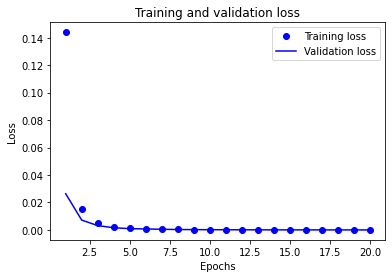

In [130]:
# Checking Overfit
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

conférence : https://www.youtube.com/watch?v=xKRmWEJ5OhI

2nde partie : https://www.youtube.com/watch?v=ob1yS9g-Zcs

Bon manuel sur le DL : https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff

Get Started keras Framework TF: https://keras.io/getting_started/